In [1]:
import os
from PIL import Image
import numpy as np
import re
import pandas as pd
import pickle as pkl

In [2]:
def load_pickle(file_path):
    with open(file_path,'rb') as f:
        object=pkl.load(f)
    return object

In [3]:
images_list=load_pickle(r"D:\Dipto\I.B.M\CODE_FILES\images_list.pkl")
labels_list=load_pickle(r"D:\Dipto\I.B.M\CODE_FILES\labels_list.pkl")

In [4]:
import numpy as np
from PIL import Image

def process_images(image_list, label_list):
    processed_images = []
    processed_labels = []
    for img, label in zip(image_list, label_list):
        img_pil = Image.fromarray(img, mode='RGB')
        width, height = img_pil.size
        if 450 <= width <= 740 and 450 <= height <= 740:
            if height < width:
                img_pil = img_pil.rotate(90, expand=True)
            img_resized = img_pil.resize((450,720))
            processed_images.append(np.array(img_resized)) 
            processed_labels.append(label)
    stacked_images = np.stack(processed_images, axis=0)
    return stacked_images, processed_labels


In [3]:
# images_list=load_pickle(r"C:\Users\admin\Documents\Programming\IBM\data_processed\formatted_image.pkl")
# labels_list=load_pickle(r"C:\Users\admin\Documents\Programming\IBM\data_processed\formatted_labels.pkl")

In [5]:
stacked_images,process_label=process_images(images_list,labels_list)

In [6]:
with open(r"D:\Dipto\I.B.M\CODE_FILES\Filtered_data\formatted_image.pkl", 'wb') as f:
    pkl.dump(stacked_images,f)

with open(r"D:\Dipto\I.B.M\CODE_FILES\Filtered_data\formatted_labels.pkl", 'wb') as f:
    pkl.dump(process_label, f)

In [7]:
df=pd.DataFrame({'labels':labels_list})

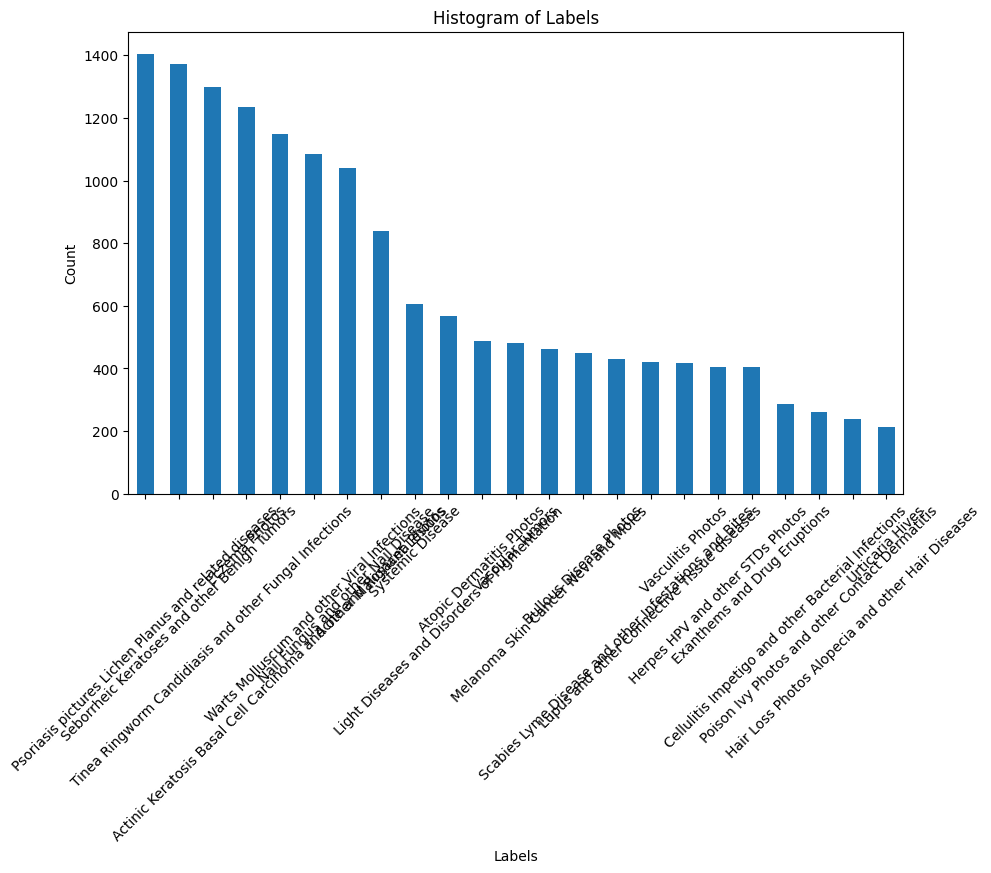

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'labels' is the column of interest
label_counts = df.labels.value_counts()

# Create a histogram
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Histogram of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [10]:
stacked_images.shape

(15499, 450, 720, 3)

In [11]:
#stacked_images=np.transpose(stacked_images, (0, 2, 1, 3))
with open(r"D:\Dipto\I.B.M\CODE_FILES\Filtered_data\formatted_image.pkl", 'wb') as labels_file:
    pkl.dump(stacked_images, labels_file)

In [12]:
import numpy as np
import tensorflow as tf
batch_size = 1000  # Set your desired batch size
dataset = tf.data.Dataset.from_tensor_slices(stacked_images)
dataset = dataset.batch(batch_size)
for batch in dataset:
    print(batch.shape)

(1000, 450, 720, 3)
(1000, 450, 720, 3)
(1000, 450, 720, 3)
(1000, 450, 720, 3)
(1000, 450, 720, 3)
(1000, 450, 720, 3)
(1000, 450, 720, 3)
(1000, 450, 720, 3)
(1000, 450, 720, 3)
(1000, 450, 720, 3)
(1000, 450, 720, 3)
(1000, 450, 720, 3)
(1000, 450, 720, 3)
(1000, 450, 720, 3)
(1000, 450, 720, 3)
(499, 450, 720, 3)
